In [103]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [104]:
digits = load_digits()

In [105]:
print("Shape of images:", digits.images.shape)
print("Shape of data:", digits.data.shape)
print("Total samples:", len(digits.target))
print("Unique classes:", np.unique(digits.target))

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)
Total samples: 1797
Unique classes: [0 1 2 3 4 5 6 7 8 9]


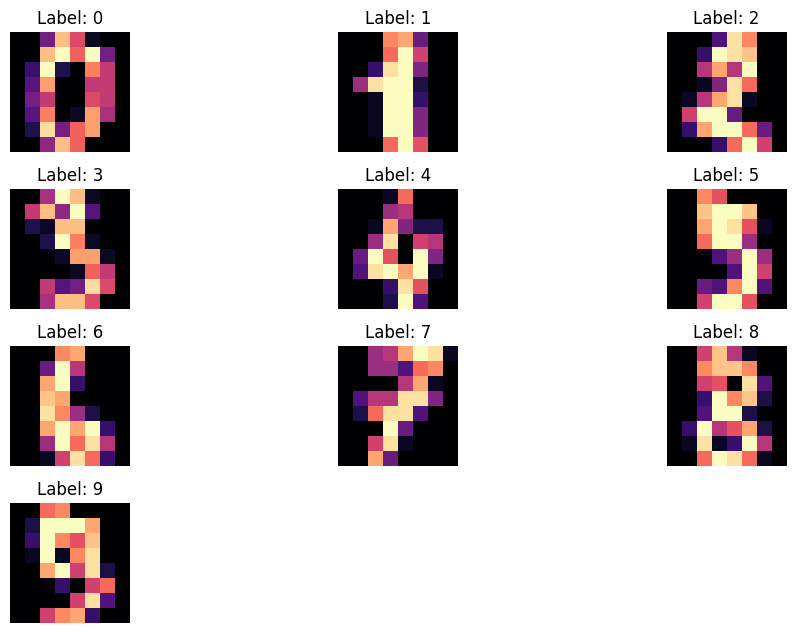

In [106]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(5,3,i+1)
    plt.imshow(digits.images[i], cmap='magma')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)

X_train shape: (1437, 64) X_test shape: (360, 64)


In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [110]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [111]:
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

SVM Accuracy: 0.975


In [112]:
print("\nKNN Classification Report:\n", classification_report(y_test, knn_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

KNN Accuracy: 0.975


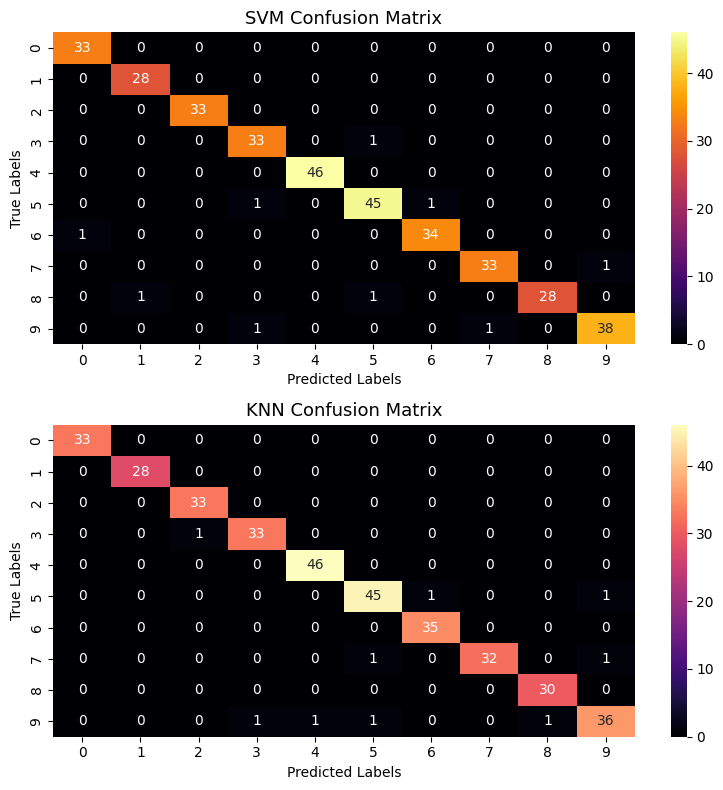

In [113]:
plt.figure(figsize=(8, 8))

# SVM Matrix
plt.subplot(2, 1, 1)
svm_cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='inferno')
plt.title("SVM Confusion Matrix", fontsize=13)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# KNN Matrix
plt.subplot(2, 1, 2)
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='magma')
plt.title("KNN Confusion Matrix", fontsize=13)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()